<a href="https://colab.research.google.com/github/Rosma640/tugas20/blob/main/80_20_Analisis_Ulasan_B_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import string
import re

In [2]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [3]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=eacd947157650cef00d43fb26da033478e9d4fa22c2a9b0e71625108e9cdf870
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [4]:
content = pd.read_csv('/content/drive/MyDrive/Skripsi/Ulasan Spotify id.csv')
content .head()

,content,score
0,"Saya sangat senang menggunakan Spotify, laguny...",2
1,"Aplikasi nya bagus, gratis bisa sepuasnya teta...",3
2,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",1
3,Maaf kenapa Spotify jadi memaksakan untuk prem...,3
4,Padahal dulu iklannya tidak separah sekarang y...,1


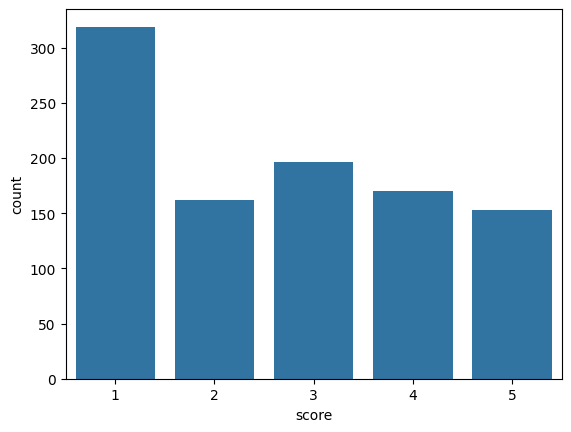

In [5]:
import seaborn as sns
sns.countplot(x='score', data=content);

In [6]:
print(f"Jumlah data {len(content)}")
print(f"score 1 = {len(content[content['score']==1])}")
print(f"score 2 = {len(content[content['score']==2])}")
print(f"score 3 = {len(content[content['score']==3])}")
print(f"score 4 = {len(content[content['score']==4])}")
print(f"score 5 = {len(content[content['score']==5])}")

Jumlah data 1000
score 1 = 319
score 2 = 162
score 3 = 196
score 4 = 170
score 5 = 153


In [7]:
# Pelabelan data ulasan
def pelabelan(score):
  if score < 4:
    return 'Negatif'
  elif score > 3 :
    return 'Positif'
content['Label'] = content ['score'].apply(pelabelan)
content.head()

,content,score,Label
0,"Saya sangat senang menggunakan Spotify, laguny...",2,Negatif
1,"Aplikasi nya bagus, gratis bisa sepuasnya teta...",3,Negatif
2,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",1,Negatif
3,Maaf kenapa Spotify jadi memaksakan untuk prem...,3,Negatif
4,Padahal dulu iklannya tidak separah sekarang y...,1,Negatif


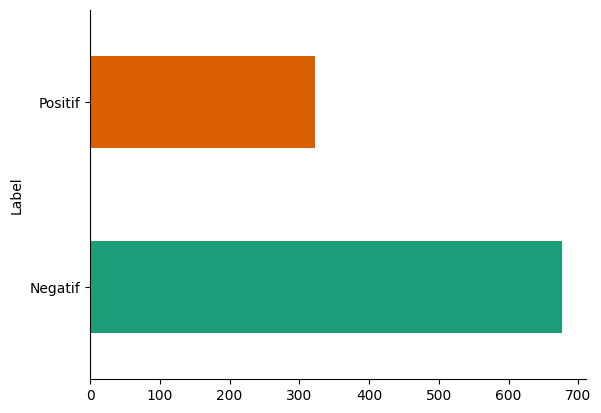

In [8]:
# @title Label

from matplotlib import pyplot as plt
import seaborn as sns
content.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Presentase sentimen**

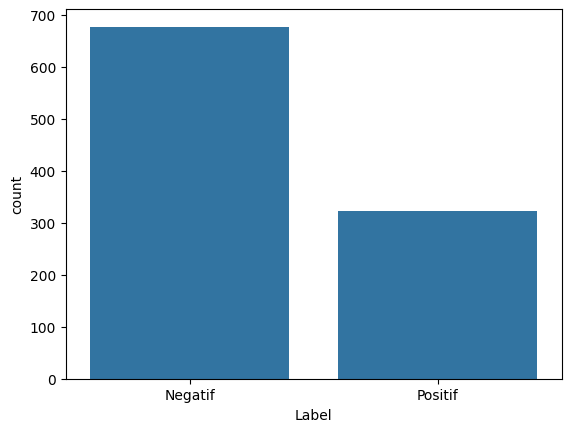

In [9]:
import seaborn as sns
sns.countplot(x='Label', data=content);

In [10]:
# Menghitung jumlah masing-masing label
label_counts = content['Label'].value_counts()

# Menampilkan jumlah label
print(label_counts)

Label
Negatif    677
Positif    323
Name: count, dtype: int64


In [11]:
content.to_csv("Hasil Labeling.csv")

([<matplotlib.patches.Wedge at 0x7caf705a41f0>,
 [Text(-0.8192553917645043, -0.7340440062181481, 'Negatif'),
  Text(0.8192553917645047, 0.7340440062181477, 'Positif')],
 [Text(-0.44686657732609325, -0.40038763975535346, '67.7%'),
  Text(0.4468665773260934, 0.40038763975535324, '32.3%')])

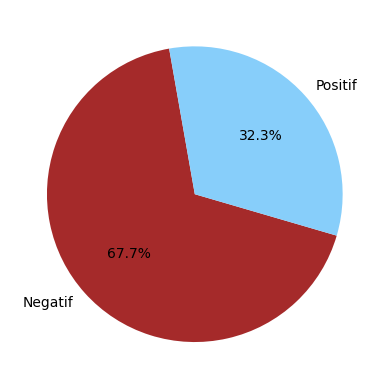

In [12]:
labels = ['Negatif', 'Positif']
sizes = [677, 323]
colors = ['brown', 'lightskyblue']

plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', startangle=100)

# **Preprocessing**

In [13]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 7.5 MB/s eta 0:00:00


In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Case Folding**

In [15]:
def casefolding(content):
  content = content.lower()
  return content
content['CaseFolding']= content['content'].apply(casefolding)
print('Case Folding : \n')
print(content['CaseFolding'].head())
print('\n\n\n')

Case Folding : 

0    saya sangat senang menggunakan spotify, laguny...
1    aplikasi nya bagus, gratis bisa sepuasnya teta...
2    udah bagus aku suka,tapi ada kesalahan,dulu bi...
3    maaf kenapa spotify jadi memaksakan untuk prem...
4    padahal dulu iklannya tidak separah sekarang y...
Name: CaseFolding, dtype: object






In [16]:
content.head()

,content,score,Label,CaseFolding
0,"Saya sangat senang menggunakan Spotify, laguny...",2,Negatif,"saya sangat senang menggunakan spotify, laguny..."
1,"Aplikasi nya bagus, gratis bisa sepuasnya teta...",3,Negatif,"aplikasi nya bagus, gratis bisa sepuasnya teta..."
2,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",1,Negatif,"udah bagus aku suka,tapi ada kesalahan,dulu bi..."
3,Maaf kenapa Spotify jadi memaksakan untuk prem...,3,Negatif,maaf kenapa spotify jadi memaksakan untuk prem...
4,Padahal dulu iklannya tidak separah sekarang y...,1,Negatif,padahal dulu iklannya tidak separah sekarang y...


In [17]:
content.to_csv("Hasil_Case Folding.csv")

# **Cleaning**

In [18]:
import re
import emoji

def cleaning(content):
  content = re.sub(r'@[A-Za-a0-9]+',' ',content)
  content = re.sub(r'#[A-Za-z0-9]+',' ',content)
  content = re.sub(r"http\S+",' ',content)
  content = re.sub(r'[0-9]+',' ',content)
  content = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", content)
  content = content.strip(' ')
  return content
content['Cleaning']= content['CaseFolding'].apply(cleaning)

def Emoji(content):
    return content.encode('ascii', 'ignore').decode('ascii')
content['Cleaning']= content['Cleaning'].apply(Emoji)

def replace(content):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', content)
content['Cleaning']= content['Cleaning'].apply(replace)

print('Cleaning: \n')
print(content['Cleaning'].head())
print('\n\n\n')


Cleaning: 

0    saya sangat senang menggunakan spotify  laguny...
1    aplikasi nya bagus  gratis bisa sepuasnya teta...
2    udah bagus aku suka tapi ada kesalahan dulu bi...
3    maaf kenapa spotify jadi memaksakan untuk prem...
4    padahal dulu iklannya tidak separah sekarang y...
Name: Cleaning, dtype: object






In [19]:
content.head()

,content,score,Label,CaseFolding,Cleaning
0,"Saya sangat senang menggunakan Spotify, laguny...",2,Negatif,"saya sangat senang menggunakan spotify, laguny...",saya sangat senang menggunakan spotify laguny...
1,"Aplikasi nya bagus, gratis bisa sepuasnya teta...",3,Negatif,"aplikasi nya bagus, gratis bisa sepuasnya teta...",aplikasi nya bagus gratis bisa sepuasnya teta...
2,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",1,Negatif,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",udah bagus aku suka tapi ada kesalahan dulu bi...
3,Maaf kenapa Spotify jadi memaksakan untuk prem...,3,Negatif,maaf kenapa spotify jadi memaksakan untuk prem...,maaf kenapa spotify jadi memaksakan untuk prem...
4,Padahal dulu iklannya tidak separah sekarang y...,1,Negatif,padahal dulu iklannya tidak separah sekarang y...,padahal dulu iklannya tidak separah sekarang y...


In [20]:
content.to_csv("Hasil_Cleaning.csv")

# **Tokenizing**

In [21]:
import nltk
from nltk.tokenize import word_tokenize
def tokenizing(content):
  content = word_tokenize(content)
  return content
content['Tokenizing']= content['Cleaning'].apply(tokenizing)
print('Tokenizing : \n')
print(content['Tokenizing'].head())
print('\n\n\n')

Tokenizing : 

0    [saya, sangat, senang, menggunakan, spotify, l...
1    [aplikasi, nya, bagus, gratis, bisa, sepuasnya...
2    [udah, bagus, aku, suka, tapi, ada, kesalahan,...
3    [maaf, kenapa, spotify, jadi, memaksakan, untu...
4    [padahal, dulu, iklannya, tidak, separah, seka...
Name: Tokenizing, dtype: object






In [22]:
content.head()

,content,score,Label,CaseFolding,Cleaning,Tokenizing
0,"Saya sangat senang menggunakan Spotify, laguny...",2,Negatif,"saya sangat senang menggunakan spotify, laguny...",saya sangat senang menggunakan spotify laguny...,"[saya, sangat, senang, menggunakan, spotify, l..."
1,"Aplikasi nya bagus, gratis bisa sepuasnya teta...",3,Negatif,"aplikasi nya bagus, gratis bisa sepuasnya teta...",aplikasi nya bagus gratis bisa sepuasnya teta...,"[aplikasi, nya, bagus, gratis, bisa, sepuasnya..."
2,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",1,Negatif,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",udah bagus aku suka tapi ada kesalahan dulu bi...,"[udah, bagus, aku, suka, tapi, ada, kesalahan,..."
3,Maaf kenapa Spotify jadi memaksakan untuk prem...,3,Negatif,maaf kenapa spotify jadi memaksakan untuk prem...,maaf kenapa spotify jadi memaksakan untuk prem...,"[maaf, kenapa, spotify, jadi, memaksakan, untu..."
4,Padahal dulu iklannya tidak separah sekarang y...,1,Negatif,padahal dulu iklannya tidak separah sekarang y...,padahal dulu iklannya tidak separah sekarang y...,"[padahal, dulu, iklannya, tidak, separah, seka..."


In [23]:
content.to_csv("Hasil_Tokenizing.csv")

# **Stopword Removal**

In [24]:
import nltk
nltk.download('stopwords')
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.StopWordRemover.StopWordRemover import StopWordRemover
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Membuat objek factory untuk membuat StopWordRemover
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Daftar stopwords tambahan
daftar_stopword = stopwords.words('indonesian')

def stopwordText(words):
 return [word for word in words if word not in daftar_stopword]

content['Stopword Removal'] = content['Tokenizing'].apply(stopwordText)
print('Stopword Removal: \n')
print(content['Stopword Removal'].head())
print('\n\n\n')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Stopword Removal: 

0    [senang, spotify, lagunya, bervariasi, lawas, ...
1    [aplikasi, nya, bagus, gratis, sepuasnya, ikla...
2    [udah, bagus, suka, kesalahan, dengerin, lagu,...
3    [maaf, spotify, memaksakan, premium, ya, lagu,...
4    [iklannya, separah, iklan, jeda, lagu, maklumi...
Name: Stopword Removal, dtype: object






In [25]:
content.head()

,content,score,Label,CaseFolding,Cleaning,Tokenizing,Stopword Removal
0,"Saya sangat senang menggunakan Spotify, laguny...",2,Negatif,"saya sangat senang menggunakan spotify, laguny...",saya sangat senang menggunakan spotify laguny...,"[saya, sangat, senang, menggunakan, spotify, l...","[senang, spotify, lagunya, bervariasi, lawas, ..."
1,"Aplikasi nya bagus, gratis bisa sepuasnya teta...",3,Negatif,"aplikasi nya bagus, gratis bisa sepuasnya teta...",aplikasi nya bagus gratis bisa sepuasnya teta...,"[aplikasi, nya, bagus, gratis, bisa, sepuasnya...","[aplikasi, nya, bagus, gratis, sepuasnya, ikla..."
2,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",1,Negatif,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",udah bagus aku suka tapi ada kesalahan dulu bi...,"[udah, bagus, aku, suka, tapi, ada, kesalahan,...","[udah, bagus, suka, kesalahan, dengerin, lagu,..."
3,Maaf kenapa Spotify jadi memaksakan untuk prem...,3,Negatif,maaf kenapa spotify jadi memaksakan untuk prem...,maaf kenapa spotify jadi memaksakan untuk prem...,"[maaf, kenapa, spotify, jadi, memaksakan, untu...","[maaf, spotify, memaksakan, premium, ya, lagu,..."
4,Padahal dulu iklannya tidak separah sekarang y...,1,Negatif,padahal dulu iklannya tidak separah sekarang y...,padahal dulu iklannya tidak separah sekarang y...,"[padahal, dulu, iklannya, tidak, separah, seka...","[iklannya, separah, iklan, jeda, lagu, maklumi..."


In [26]:
content.to_csv('stopword.csv')

# **Stemming**

In [27]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in content['Stopword Removal']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

def stemmingText(document):
    return [term_dict[term] for term in document]

content['Stemming'] = content['Stopword Removal'].swifter.apply(stemmingText)

senang : senang
spotify : spotify
lagunya : lagu
bervariasi : variasi
lawas : lawas
bgt : bgt
terbaru : baru
disayangkan : sayang
mengurangi : kurang
fitur : fitur
lirik : lirik
lagu : lagu
teramat : amat
pendengar : dengar
karaoke : karaoke
enjoy : enjoy
menikmati : nikmat
asing : asing
membutuhkan : butuh
terjemahan : terjemah
harap : harap
memperbaiki : baik
laguu : laguu
selebihnya : lebih
fine : fine
aplikasi : aplikasi
nya : nya
bagus : bagus
gratis : gratis
sepuasnya : puas
iklan : iklan
pas : pas
ganti : ganti
kali : kali
muncul : muncul
ya : ya
kalo : kalo
gak : gak
premium : premium
udah : udah
kayak : kayak
gitu : gitu
kebanyakan : banyak
sih : sih
iklannya : iklan
detik : detik
menit : menit
putar : putar
aja : aja
perdapat : dapat
dikurangi : rang
kasih : kasih
bintang : bintang
deh : deh
suka : suka
kesalahan : salah
dengerin : dengerin
ga : ga
pake : pake
kuota : kuota
hidupin : hidupin
data : data
gabisa : gabisa
tolong : tolong
perbaiki : baik
loh : loh
malem : malem
e

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

In [28]:
content.head()

,content,score,Label,CaseFolding,Cleaning,Tokenizing,Stopword Removal,Stemming
0,"Saya sangat senang menggunakan Spotify, laguny...",2,Negatif,"saya sangat senang menggunakan spotify, laguny...",saya sangat senang menggunakan spotify laguny...,"[saya, sangat, senang, menggunakan, spotify, l...","[senang, spotify, lagunya, bervariasi, lawas, ...","[senang, spotify, lagu, variasi, lawas, bgt, b..."
1,"Aplikasi nya bagus, gratis bisa sepuasnya teta...",3,Negatif,"aplikasi nya bagus, gratis bisa sepuasnya teta...",aplikasi nya bagus gratis bisa sepuasnya teta...,"[aplikasi, nya, bagus, gratis, bisa, sepuasnya...","[aplikasi, nya, bagus, gratis, sepuasnya, ikla...","[aplikasi, nya, bagus, gratis, puas, iklan, pa..."
2,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",1,Negatif,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",udah bagus aku suka tapi ada kesalahan dulu bi...,"[udah, bagus, aku, suka, tapi, ada, kesalahan,...","[udah, bagus, suka, kesalahan, dengerin, lagu,...","[udah, bagus, suka, salah, dengerin, lagu, ga,..."
3,Maaf kenapa Spotify jadi memaksakan untuk prem...,3,Negatif,maaf kenapa spotify jadi memaksakan untuk prem...,maaf kenapa spotify jadi memaksakan untuk prem...,"[maaf, kenapa, spotify, jadi, memaksakan, untu...","[maaf, spotify, memaksakan, premium, ya, lagu,...","[maaf, spotify, paksa, premium, ya, lagu, ikla..."
4,Padahal dulu iklannya tidak separah sekarang y...,1,Negatif,padahal dulu iklannya tidak separah sekarang y...,padahal dulu iklannya tidak separah sekarang y...,"[padahal, dulu, iklannya, tidak, separah, seka...","[iklannya, separah, iklan, jeda, lagu, maklumi...","[iklan, parah, iklan, jeda, lagu, maklum, guna..."


In [29]:
content.to_csv("hasil stemming.csv")

In [30]:
def join_text_list(texts):
    return ' '.join(texts)

content["dataset_join"] = content["Stemming"].apply(join_text_list)

content["dataset_join"].head()

0    senang spotify lagu variasi lawas bgt baru say...
1    aplikasi nya bagus gratis puas iklan pas ganti...
2    udah bagus suka salah dengerin lagu ga pake ku...
3    maaf spotify paksa premium ya lagu iklan nya i...
4    iklan parah iklan jeda lagu maklum guna premiu...
Name: dataset_join, dtype: object

In [31]:
content.head()

,content,score,Label,CaseFolding,Cleaning,Tokenizing,Stopword Removal,Stemming,dataset_join
0,"Saya sangat senang menggunakan Spotify, laguny...",2,Negatif,"saya sangat senang menggunakan spotify, laguny...",saya sangat senang menggunakan spotify laguny...,"[saya, sangat, senang, menggunakan, spotify, l...","[senang, spotify, lagunya, bervariasi, lawas, ...","[senang, spotify, lagu, variasi, lawas, bgt, b...",senang spotify lagu variasi lawas bgt baru say...
1,"Aplikasi nya bagus, gratis bisa sepuasnya teta...",3,Negatif,"aplikasi nya bagus, gratis bisa sepuasnya teta...",aplikasi nya bagus gratis bisa sepuasnya teta...,"[aplikasi, nya, bagus, gratis, bisa, sepuasnya...","[aplikasi, nya, bagus, gratis, sepuasnya, ikla...","[aplikasi, nya, bagus, gratis, puas, iklan, pa...",aplikasi nya bagus gratis puas iklan pas ganti...
2,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",1,Negatif,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",udah bagus aku suka tapi ada kesalahan dulu bi...,"[udah, bagus, aku, suka, tapi, ada, kesalahan,...","[udah, bagus, suka, kesalahan, dengerin, lagu,...","[udah, bagus, suka, salah, dengerin, lagu, ga,...",udah bagus suka salah dengerin lagu ga pake ku...
3,Maaf kenapa Spotify jadi memaksakan untuk prem...,3,Negatif,maaf kenapa spotify jadi memaksakan untuk prem...,maaf kenapa spotify jadi memaksakan untuk prem...,"[maaf, kenapa, spotify, jadi, memaksakan, untu...","[maaf, spotify, memaksakan, premium, ya, lagu,...","[maaf, spotify, paksa, premium, ya, lagu, ikla...",maaf spotify paksa premium ya lagu iklan nya i...
4,Padahal dulu iklannya tidak separah sekarang y...,1,Negatif,padahal dulu iklannya tidak separah sekarang y...,padahal dulu iklannya tidak separah sekarang y...,"[padahal, dulu, iklannya, tidak, separah, seka...","[iklannya, separah, iklan, jeda, lagu, maklumi...","[iklan, parah, iklan, jeda, lagu, maklum, guna...",iklan parah iklan jeda lagu maklum guna premiu...


In [32]:
content.to_csv("hasil preprocessing.csv")

# **Wordcloud**

In [33]:
from wordcloud import WordCloud

In [34]:
df_negative = content[ (content['score']==1) | (content['score']==2) | (content['score']==3)]
df_positive = content[ (content['score']==4) | (content['score']==5)]
#convert to list
negative_list= df_negative['dataset_join'].tolist()
positive_list= df_positive['dataset_join'].tolist()

filtered_negative = ("").join(str(negative_list))
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list))
filtered_positive = filtered_positive.lower()

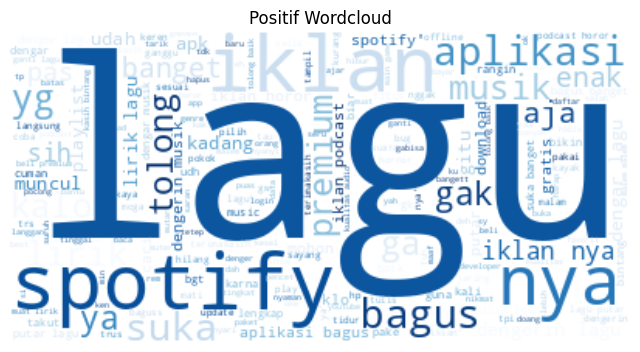

In [35]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Blues").generate(filtered_positive)
plt.figure(figsize=[8,6])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positif Wordcloud")
plt.show()

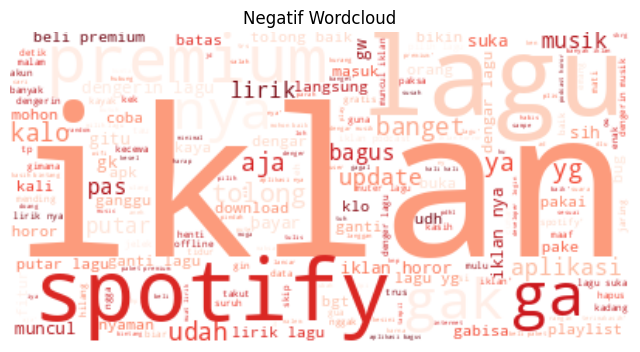

In [36]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[8,6])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negatif Wordcloud")
plt.show()

# **Analisis Data**

In [37]:
!pip install imblearn

In [38]:
import pandas as pd
import pickle
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Extract features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(content['dataset_join'])
y = content['Label']

In [40]:
# Convert the vectorized words to a DataFrame
vectorized_words_df = pd.DataFrame(X.toarray())

# Concatenate the vectorized words DataFrame with the original dataset
dataset_with_vectors = pd.concat([content, vectorized_words_df], axis=1)

In [41]:
# Print the dataset with vectorized words
dataset_with_vectors

,content,score,Label,CaseFolding,Cleaning,Tokenizing,Stopword Removal,Stemming,dataset_join,0,...,990,991,992,993,994,995,996,997,998,999
0,"Saya sangat senang menggunakan Spotify, laguny...",2,Negatif,"saya sangat senang menggunakan spotify, laguny...",saya sangat senang menggunakan spotify laguny...,"[saya, sangat, senang, menggunakan, spotify, l...","[senang, spotify, lagunya, bervariasi, lawas, ...","[senang, spotify, lagu, variasi, lawas, bgt, b...",senang spotify lagu variasi lawas bgt baru say...,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,"Aplikasi nya bagus, gratis bisa sepuasnya teta...",3,Negatif,"aplikasi nya bagus, gratis bisa sepuasnya teta...",aplikasi nya bagus gratis bisa sepuasnya teta...,"[aplikasi, nya, bagus, gratis, bisa, sepuasnya...","[aplikasi, nya, bagus, gratis, sepuasnya, ikla...","[aplikasi, nya, bagus, gratis, puas, iklan, pa...",aplikasi nya bagus gratis puas iklan pas ganti...,0.0,...,0.0,0.268305,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",1,Negatif,"udah bagus aku suka,tapi ada kesalahan,dulu bi...",udah bagus aku suka tapi ada kesalahan dulu bi...,"[udah, bagus, aku, suka, tapi, ada, kesalahan,...","[udah, bagus, suka, kesalahan, dengerin, lagu,...","[udah, bagus, suka, salah, dengerin, lagu, ga,...",udah bagus suka salah dengerin lagu ga pake ku...,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,Maaf kenapa Spotify jadi memaksakan untuk prem...,3,Negatif,maaf kenapa spotify jadi memaksakan untuk prem...,maaf kenapa spotify jadi memaksakan untuk prem...,"[maaf, kenapa, spotify, jadi, memaksakan, untu...","[maaf, spotify, memaksakan, premium, ya, lagu,...","[maaf, spotify, paksa, premium, ya, lagu, ikla...",maaf spotify paksa premium ya lagu iklan nya i...,0.0,...,0.0,0.129611,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,Padahal dulu iklannya tidak separah sekarang y...,1,Negatif,padahal dulu iklannya tidak separah sekarang y...,padahal dulu iklannya tidak separah sekarang y...,"[padahal, dulu, iklannya, tidak, separah, seka...","[iklannya, separah, iklan, jeda, lagu, maklumi...","[iklan, parah, iklan, jeda, lagu, maklum, guna...",iklan parah iklan jeda lagu maklum guna premiu...,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Kenapa hari ini selasa 5 des 2023 Spotify ku g...,5,Positif,kenapa hari ini selasa 5 des 2023 spotify ku g...,kenapa hari ini selasa des spotify ku gak bisa...,"[kenapa, hari, ini, selasa, des, spotify, ku, ...","[selasa, des, spotify, ku, gak, dibuka, muncul...","[selasa, des, spotify, ku, gak, buka, muncul, ...",selasa des spotify ku gak buka muncul blank la...,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
996,Suara bagus walaupun belum setingkat FLAC & DS...,5,Positif,suara bagus walaupun belum setingkat flac & ds...,suara bagus walaupun belum setingkat flac & ds...,"[suara, bagus, walaupun, belum, setingkat, fla...","[suara, bagus, setingkat, flac, &, dsd, gratis...","[suara, bagus, tingkat, flac, , dsd, gratis, b...",suara bagus tingkat flac dsd gratis bilang ba...,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
997,Ter untuk spotify tuluuuung kurangin iklannya ...,4,Positif,ter untuk spotify tuluuuung kurangin iklannya ...,ter untuk spotify tulung kurangin iklannya kar...,"[ter, untuk, spotify, tulung, kurangin, iklann...","[ter, spotify, tulung, kurangin, iklannya, lag...","[ter, spotify, tulung, rangin, iklan, lagu, fa...",ter spotify tulung rangin iklan lagu favorit r...,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.325178,0.0,0.0
998,dikit no login kenapa ya why Spotify apa yg sa...,5,Positif,dikit no login kenapa ya why spotify apa yg sa...,dikit no login kenapa ya why spotify apa yg sa...,"[dikit, no, login, kenapa, ya, why, spotify, a...","[dikit, no, login, ya, why, spotify, yg, salah...","[dikit, no, login, ya, why, spotify, yg, s

In [45]:
!pip install joblib

In [42]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# saving
with open('vectorizer.pickle', 'wb') as handle:
    pickle.dump(dataset_with_vectors, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('vectorizer.pickle', 'rb') as handle:
    vectorizer = pickle.load(handle)

In [143]:
from joblib import dump
dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

# ***Sampling***

In [48]:
# Random oversampling
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

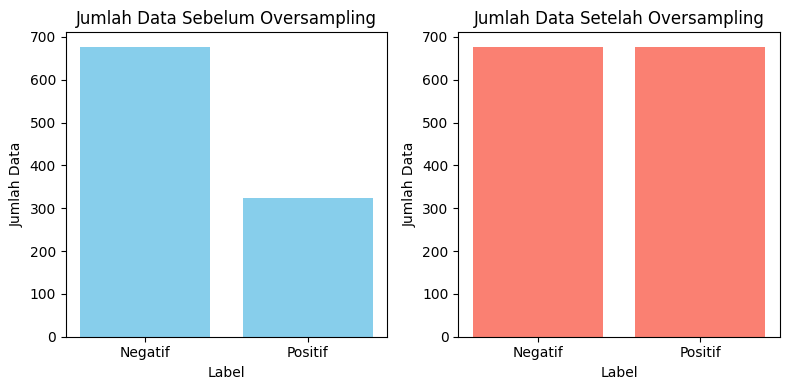

In [49]:
# Random oversampling
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X, y)

# Membuat dataframe untuk label y sebelum dan setelah oversampling
data_before = pd.Series(y).value_counts()
data_after = pd.Series(y_train_resampled).value_counts()

# Plot diagram batang
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.bar(data_before.index, data_before.values, color='skyblue')
plt.title('Jumlah Data Sebelum Oversampling')
plt.xlabel('Label')
plt.ylabel('Jumlah Data')

plt.subplot(1, 2, 2)
plt.bar(data_after.index, data_after.values, color='salmon')
plt.title('Jumlah Data Setelah Oversampling')
plt.xlabel('Label')
plt.ylabel('Jumlah Data')

plt.tight_layout()
plt.show()

In [50]:
# Menampilkan jumlah data sebelum oversampling
print("Jumlah data sebelum oversampling:")
print(pd.Series(y).value_counts())

# Menampilkan jumlah data setelah oversampling
print("Jumlah data setelah oversampling:")
print(pd.Series(y_train_resampled).value_counts())

Jumlah data sebelum oversampling:
Label
Negatif    677
Positif    323
Name: count, dtype: int64
Jumlah data setelah oversampling:
Label
Negatif    677
Positif    677
Name: count, dtype: int64


In [51]:
y_train_resampled

0       Negatif
1       Negatif
2       Negatif
3       Negatif
4       Negatif
         ...   
1349    Positif
1350    Positif
1351    Positif
1352    Positif
1353    Positif
Name: Label, Length: 1354, dtype: object

In [52]:
X_train_resampled

<1354x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 20654 stored elements in Compressed Sparse Row format>

In [276]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [310]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5, random_state=42)

# ***Train Data***

In [311]:
# Make predictions on the train data
y_pred = rf_model.predict(X_train)

# Display classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

     Negatif       0.90      0.85      0.88       530
     Positif       0.87      0.91      0.89       553

    accuracy                           0.88      1083
   macro avg       0.88      0.88      0.88      1083
weighted avg       0.88      0.88      0.88      1083



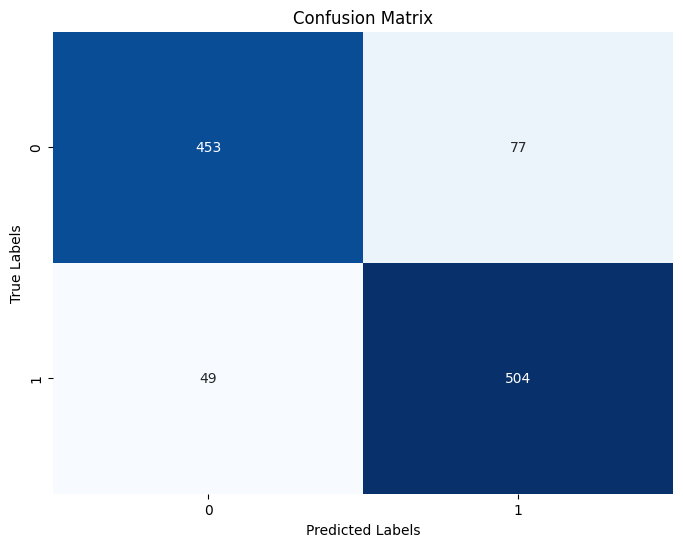

              precision    recall  f1-score   support

     Negatif       0.90      0.85      0.88       530
     Positif       0.87      0.91      0.89       553

    accuracy                           0.88      1083
   macro avg       0.88      0.88      0.88      1083
weighted avg       0.88      0.88      0.88      1083

Accuracy: 0.8836565096952909


In [312]:
# Create a confusion matrix
confusion = confusion_matrix(y_train, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate evaluation metrics
report = classification_report(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)

print(report)
print("Accuracy:", accuracy)

# ***Test Data***

In [313]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Negatif       0.92      0.88      0.90       147
     Positif       0.87      0.91      0.89       124

    accuracy                           0.90       271
   macro avg       0.90      0.90      0.90       271
weighted avg       0.90      0.90      0.90       271



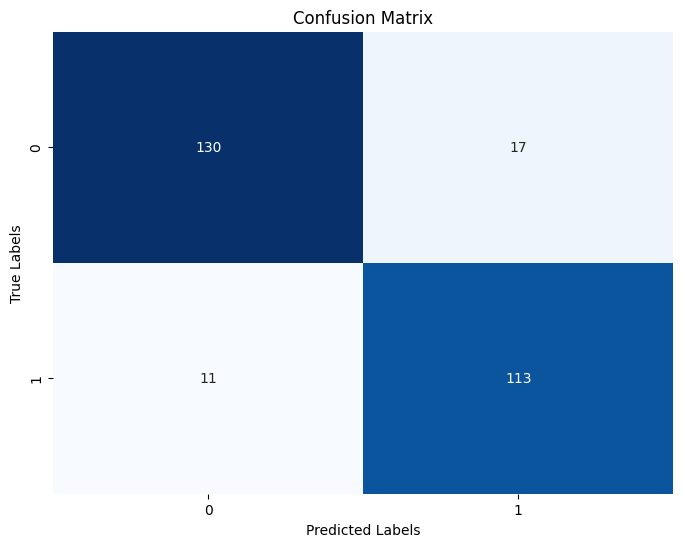

              precision    recall  f1-score   support

     Negatif       0.92      0.88      0.90       147
     Positif       0.87      0.91      0.89       124

    accuracy                           0.90       271
   macro avg       0.90      0.90      0.90       271
weighted avg       0.90      0.90      0.90       271

Accuracy: 0.8966789667896679


In [314]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate evaluation metrics
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(report)
print("Accuracy:", accuracy)

In [315]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[130  17]
 [ 11 113]]


In [316]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8966789667896679
Precision: 0.8978469751964296
Recall: 0.8966789667896679
F1 Score: 0.8968230331909619


In [317]:
import pickle

# Simpan model ke file pkl
with open('model_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [318]:
# Memanggil model dari file pkl
with open('model_rf.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [319]:
from joblib import dump
dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']

In [320]:
# Melakukan prediksi pada data uji
y_pred = rf_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.8966789667896679


In [321]:
# Simpan data Vektor file CSV
dataset_with_vectors.to_csv('/content/dataset_vectors.csv', index=False)

In [322]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Melakukan 5-fold cross-validation pada data pelatihan
cv_scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5)

# Menampilkan hasil cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

rf_model.fit(X_train_resampled, y_train_resampled)

# Mengevaluasi model pada data testing
test_score = rf_model.score(X_test, y_test)
print("Test set score:", test_score)

Cross-validation scores: [0.75645756 0.85608856 0.79704797 0.78597786 0.78148148]
Mean cross-validation score: 0.7954106874402077
Test set score: 0.8966789667896679
